In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Setup DB Stuff
from ..database.connection import get_collections
collections = get_collections()


ImportError: attempted relative import with no known parent package

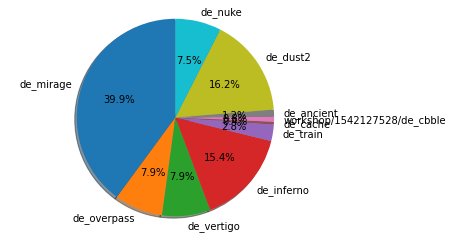

{'de_mirage': {'count': 101}, 'de_overpass': {'count': 20}, 'de_vertigo': {'count': 20}, 'de_inferno': {'count': 39}, 'de_train': {'count': 7}, 'de_cache': {'count': 1}, 'workshop/1542127528/de_cbble': {'count': 2}, 'de_ancient': {'count': 3}, 'de_dust2': {'count': 41}, 'de_nuke': {'count': 19}}


In [ ]:
map_count = dict()
map_countCursor = collections["matches"].aggregate([
            {"$group": {
                "_id": "$map",
                "count": {"$sum": 1}
            }}
        ])
        
labels = tuple()
sizes = list()

for doc in map_countCursor:
  labels += (doc["_id"],)
  sizes += (doc["count"],)
  map_count[doc["_id"]] = dict(count=doc["count"])


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

print(map_count)




In [ ]:
""" matches = collections["matches"].find({"map": "de_mirage"})

CT = 0
T = 0

for match in matches:
  rounds = list(collections["rounds"].find({"_id": {"$in": match["rounds"] }}))
  print(len(rounds))

  for idx, round in enumerate(rounds):
    if round["type"] == "KNIFE":
      continue
    
    winningTeam = match["teams"].index(round["winningTeam"])

    isHalftime = idx 

    if idx < 15 and winningTeam["startingSide"] == "TERRORIST":
      T += 1
    if idx > 15 and winningTeam["startingSide"] == "COUNTER_TERRORIST":
      T += 1

    if idx < 15 and winningTeam["startingSide"] == "COUNTER_TERRORIST":
      CT += 1
    if idx > 15 and winningTeam["startingSide"] == "TERRORIST":
      CT += 1     """  

' matches = collections["matches"].find({"map": "de_mirage"})\n\nCT = 0\nT = 0\n\nfor match in matches:\n  rounds = list(collections["rounds"].find({"_id": {"$in": match["rounds"] }}))\n  print(len(rounds))\n\n  for idx, round in enumerate(rounds):\n    if round["type"] == "KNIFE":\n      continue\n    \n    winningTeam = match["teams"].index(round["winningTeam"])\n\n    isHalftime = idx \n\n    if idx < 15 and winningTeam["startingSide"] == "TERRORIST":\n      T += 1\n    if idx > 15 and winningTeam["startingSide"] == "COUNTER_TERRORIST":\n      T += 1\n\n    if idx < 15 and winningTeam["startingSide"] == "COUNTER_TERRORIST":\n      CT += 1\n    if idx > 15 and winningTeam["startingSide"] == "TERRORIST":\n      CT += 1     '

In [ ]:
x = []

for map in map_count:
  print(f'Calculating {map}')

  x.append(map)

  matches = collections["matches"].find({"map": map})

  mapDf = None

  for match in matches:
    rounds = list(collections["rounds"].find({"_id": {"$in": list(match["rounds"]) }}))
    if len(rounds) == 0:
      continue

    df = pd.DataFrame(rounds)

    df["roundDuration"] = df["officialEndTick"] - df["startTick"]
    #print(df["roundDuration"].describe())
  
    if mapDf is None:
      mapDf = df
    else:
      mapDf = mapDf.append(df)

  map_count[map]["roundDuration"] = mapDf["roundDuration"] / 128








Calculating de_mirage
Calculating de_overpass
Calculating de_vertigo
Calculating de_inferno
Calculating de_train
Calculating de_cache
Calculating workshop/1542127528/de_cbble
Calculating de_ancient
Calculating de_dust2
Calculating de_nuke


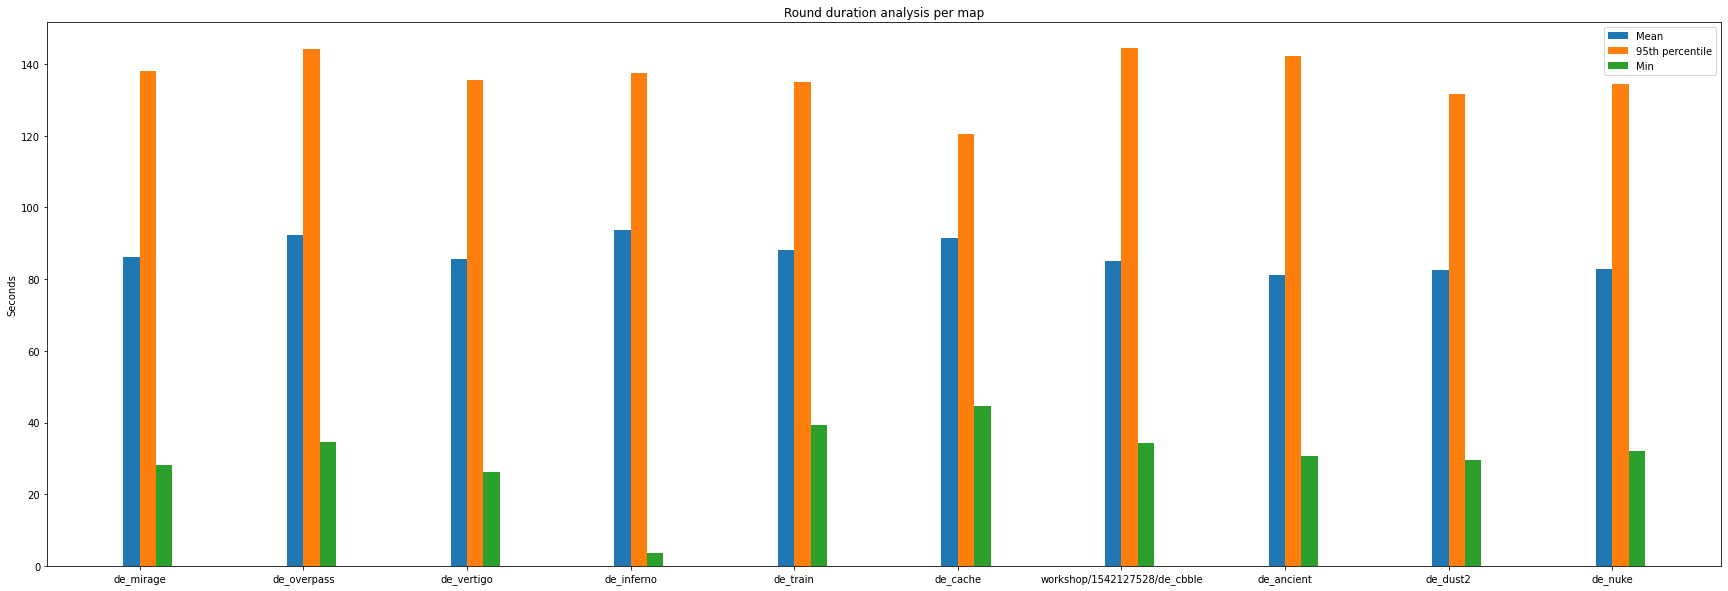

In [ ]:
N = 10
duration_mean = list()
duration_percentile = list()
duration_min = list()

for map in map_count:
    duration_mean.append(map_count[map]["roundDuration"].mean())
    duration_percentile.append(map_count[map]["roundDuration"].quantile(0.95))
    duration_min.append(map_count[map]["roundDuration"].min())

ind = np.arange(N) 
width = 0.1   

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)

plt.bar(ind, duration_mean, width, label='Mean')
plt.bar(ind + width, duration_percentile, width, label='95th percentile')
plt.bar(ind + width + width, duration_min, width, label='Min')

plt.ylabel('Seconds')
plt.title('Round duration analysis per map')

plt.xticks(ind + width / 2, map_count.keys())
plt.legend(loc='best')
plt.show()